# 🍿 The Age of Recommendation Systems
A recommender system is like a helper that tries to guess what you might like based on things you've liked before. You can see recommendation systems in play everywhere in day to day life from your next auto-playing YouTube video to the next credit card upgrade you get offered on your email

Recommender systems are really helpful because they save you time and make it easier to find things you like. Instead of having to search for things yourself, the recommender system does the work for you and suggests things that you might be interested in

Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user

![Here is an example of a recommender system where the suggested movies/films are based on previously wacthed content by the user](https://techcrunch.com/wp-content/uploads/2013/11/netflix-screenshot.jpeg)

>- 🎯 The goal of this kernel is to create a recommender system with some EDA

# 📝Loading Required Libraries


In [1]:
#Downloading and Importing libraries  
# This library will be used for sentence similarity
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Importing this library for reading a column as dict, list instead of str  
import ast 

# Importing this library for data manipulation
import pandas as pd

# Importing seaborn library for data viz
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c38d255707190d598a494c9de88adb9737f2715d0883b63501003da052f28e21
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers


# 📋 Loading the Movies Dataset

In [2]:
#Loading the movie data 
movie = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

# Reading the file columns as lists & dictionaries instead of pandas DF
movie[['genres','keywords','production_companies','production_countries','spoken_languages']] = movie[['genres','keywords','production_companies','production_countries','spoken_languages']].applymap(lambda x : ast.literal_eval(str(x)))

# Creating a function to extract the relevant data
def get_data(x, cols, dict):
    for col in cols: 
        for i in range(len(x[col])):
            for j in range(len(x[col][i])):
                x[col][i][j] = x[col][i][j][dict]
    return x

# Applying the function over multiples columns
movie = get_data(movie, ['genres','keywords','production_companies','production_countries','spoken_languages'],'name')

# Converting multiple columns to numeric
movie[['budget','id','popularity','revenue','runtime','vote_average','vote_count']] = movie[['budget','id','popularity','revenue','runtime','vote_average','vote_count']].apply(pd.to_numeric, errors = 'coerce')

# Having a look at the Movies dataset after cleansing 
movie.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 📋 Loading the Credits Dataset

In [3]:
# Loading the Credits Data 
credits = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")

# Reading the file columns as lists & dictionaries instead of pandas DF
credits[['cast', 'crew']] = credits[['cast', 'crew']].applymap(lambda x : ast.literal_eval(str(x)))

# Applying the function to clean the data
credits = get_data(credits, ['cast', 'crew'],'name')

# Having a look at the dataset 
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


# 📋 Joining the Movies and Credits Dataset

In [4]:
# Joining the data
movie = pd.merge(movie, credits[['movie_id','cast', 'crew']],  left_on= "id", right_on = "movie_id", how = "left")

# Converting column to string
movie['overview'] = movie['overview'].astype(str)

# 🔨 Exploratory Data Analysis
Doing a bit of EDA to find out if there exist any pattern between highly rated movies and certain genres

In [5]:
# Finding the top 10 grossing movies in this dataset
# Before we can do that we will need to adjust the revenue numbers with inflation

import plotly.express as px

px.bar(movie.sort_values("revenue", ascending = False).head(10).reset_index(), 
       x = "original_title", y = "revenue", title = "Highest Grossing Movies", color = "original_title",
      labels = {"original_title":"Movie Name",
               "revenue":"Revenue (USD $)"})

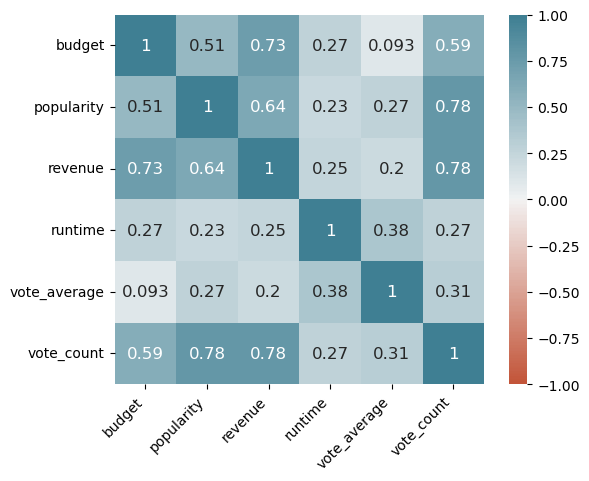

In [6]:
cor = movie.drop(["id","movie_id"], axis = 1).corr()

ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,  
    annot_kws={"size": 12}  
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There seems to be a high correlation between movie revenue and budgets but the movie rating (vote_average) seems to have a spread on effect from different variables with surprisingly movie run time being a key one. 

In [7]:
# Exploring movies which have the highest ROI 

movie["ROI"] = movie["revenue"]/movie["budget"]

movie[(movie["budget"] > 1000) & (movie["vote_count"] >500)].sort_values("ROI", ascending = False).head(10).reset_index()

px.line(movie[(movie["budget"] > 1000) & (movie["vote_count"] >500)].sort_values("ROI", ascending = False).head(20).reset_index(), 
        x = "original_title", y = "ROI", title = "Movies with highest ROI",
        labels = {"original_title":"Movie Name","ROI":"ROI (USD $)"})

Independent filmmakers feature heavily on this list with movies such as Paranormal Activity, The Blair Witch Project & Super Size Me remain movies with the highest ROIs though they seem to be more as outliers

# 🔨 Exploring relationships of Genres with Revenue & Ratings

Are certain genres associated with higher ratings and revenue? We try and explore the relationship below

In [8]:
# Creating a function to find the relationship between genres and other different parameters  
def genre_rshp(param, n):
    #We'll be only considering the Top n movies which have performed well either on the basis of revenue or ratings
    high = movie[movie["vote_count"] > 500].sort_values(param, ascending = False).head(n).reset_index()["genres"]
    high = high.apply(lambda x : ' '.join(x))
    # Split the strings into individual words and store them in a list
    words = []
    for row in high:
        words.extend(row.split())
    # Count the occurrences of each word using a dictionary
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1     
    #Sorting the dictionary on the basis of genre occurences 
    sorted_dict = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
    # Creating a new pandas DataFrame with first five key-value pairs and sum of last six values
    new_df = pd.DataFrame(columns=['Genre', 'Count'])
    other = 0
    count = 0
    for key, value in sorted_dict.items():
        if count <= 5:
            new_df = new_df.append({'Genre': key, 'Count': value}, ignore_index=True)
            count += 1
        else:
            other += value
    new_df = new_df.append({'Genre': 'Other', 'Count': other}, ignore_index=True)
    fig = px.pie(new_df, values='Count', names='Genre',
             title= "Top generes related to the highest " + param)
    return fig

#Exploring the relationship of genres alongside revenue
fig2 = genre_rshp("revenue", 200)

fig2.show()

Adventure movies rank the highest in terms of making the most revenue. Meanwhile, a mix of genres - Adventure, Action and Family makes for a good chance that the movie will make a killing at the Box Office !  

In [9]:
#Exploring the relationship of genres alongside vote avergae/ movie rating
fig3 = genre_rshp("vote_average", 200)

fig3.show()

There's a marked difference in terms of genres which get highly rated with respect to the genres which earn the most revenue. Drama leads the list over here followed by thrillers and crime genres

In [10]:
#Exploring the relationship of genres alongside popularity metric
fig4 = genre_rshp("popularity", 200)

fig4.show()

The popularity metric seems to be a cross between the above two pie charts where we can clearly see that the movies Adventure movies take the top spot followed by Action & Drama

# 🎞 Function to Find Movies with Similar Overview
Now we are going to use create a function which will compare different movie plots and then suggest a movies based on it. For comparison we are going to use the huggingface library sentence_transformers. Its framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks

In [11]:
# Loading the model for performing sentence similarity  
model = SentenceTransformer('all-MiniLM-L6-v2')
overview_embeddings = model.encode(movie['overview'])

#Compute cosine similarity between all pairs
overview_cos_sim = util.cos_sim(overview_embeddings, overview_embeddings)

Batches:   0%|          | 0/151 [00:00<?, ?it/s]

In [12]:
def recommender(movie_name):
    result = pd.concat([movie["original_title"], 
                    pd.DataFrame(overview_cos_sim[:,movie[movie["original_title"] == movie_name].index].numpy(), columns=['Overview'])],axis = 1)
    result = result[result["Overview"] != 1]
    result = result.sort_values('Overview', ascending= False).head(10).reset_index(drop =  True)
    return result

In [13]:
# Checking our function for The Dark Knight
print(recommender("The Dark Knight"))

                            original_title  Overview
0                    The Dark Knight Rises  0.701888
1                                   Batman  0.680189
2       Batman v Superman: Dawn of Justice  0.641332
3                            Batman Begins  0.614793
4  Batman: The Dark Knight Returns, Part 2  0.581422
5                           Batman Returns  0.556185
6                           Batman & Robin  0.552999
7                           Batman Forever  0.549081
8                           Brick Mansions  0.529931
9                                 Defendor  0.488361


In [14]:
print(recommender("Casino Royale"))

                        original_title  Overview
0                            Lucky You  0.507832
1                From Russia with Love  0.479233
2  Lock, Stock and Two Smoking Barrels  0.464871
3                        Runner Runner  0.460474
4                Never Say Never Again  0.455661
5                    Quantum of Solace  0.442826
6                            Octopussy  0.434504
7                             Rounders  0.432273
8                          The Gambler  0.431045
9                 Diamonds Are Forever  0.427823


In [15]:
print(recommender("Shutter Island"))

    original_title  Overview
0   Shutter Island  1.000000
1      Sea of Love  0.514629
2            Basic  0.489015
3  The Railway Man  0.480497
4      Source Code  0.446546
5   Apocalypse Now  0.445771
6     The Fugitive  0.443431
7         Face/Off  0.441590
8       Fort McCoy  0.440978
9       Spellbound  0.437253


In [16]:
print(recommender("My Name Is Khan"))

     original_title  Overview
0   Rang De Basanti  0.470745
1   Namastey London  0.421313
2  Jab Tak Hai Jaan  0.419156
3               कृष  0.414786
4      East Is East  0.404295
5          Mooz-lum  0.402652
6        Veer-Zaara  0.402647
7   The Kite Runner  0.396467
8       1947: Earth  0.389173
9            Elling  0.387060


We can see that for franchise movies like the 007 series or Batman, the movie recommendations are relevant. For one of the cult classic Scorsese - "Shutter Island" the recommendations again seem quiet relevant

Also for regional cinema like Bollywood the recommendations are on point. 

In case you have any additional comments or things you would like to add. Please go ahead in the comments!